In [6]:
from matplotlib import pyplot as plt
import numpy as np
import pandas
from IPython.display import display

In [11]:
adult_df = pandas.read_csv("AIF360 Debiasing Algo Analysis - Data Adult.csv")
adult_df = adult_df.set_index('Unnamed: 0')
compas_df = pandas.read_csv("AIF360 Debiasing Algo Analysis - Data Compas.csv")
compas_df = compas_df.set_index('Unnamed: 0')
bank_df = pandas.read_csv("AIF360 Debiasing Algo Analysis - Data Bank.csv")
bank_df = bank_df.set_index('Unnamed: 0')
german_df = pandas.read_csv("AIF360 Debiasing Algo Analysis - Data German.csv")
german_df = german_df.set_index('Unnamed: 0')

for df in [adult_df, compas_df, bank_df, german_df]:
    df["False Positive Rate Diff"] = df["False Positive Rate - Unprivileged"] - df["False Positive Rate - Privileged"]
    df["False Negative Rate Diff"] = df["False Negative Rate - Unprivileged"] - df["False Negative Rate - Privileged"]
    

In [3]:
def num_interventions(name):
    if name == "Logistic Regression" or name  == "Meta Classifier":
        return 0
    if name.count('+') == 0:
        return 1
    if name.count('+') == 1:
        return 2
    if name.count('+') == 2:
        return 3

In [52]:
no_int = []
one_int = []
two_int = []
three_int = []
for row in list(adult_df.index):
    if num_interventions(row) == 0:
        no_int.append(row)
    elif num_interventions(row) == 1:
        one_int.append(row)
    elif num_interventions(row) == 2:
        two_int.append(row)
    elif num_interventions(row) == 3:
        three_int.append(row)
        
lst = [no_int, one_int]
no_int.append("testing")
print(lst)

[['Logistic Regression', 'Meta Classifier', 'testing'], ['RW', 'DIR', 'EGR', 'GSR', 'MFC', 'PR', 'CEOP', 'ROC', 'EOP']]


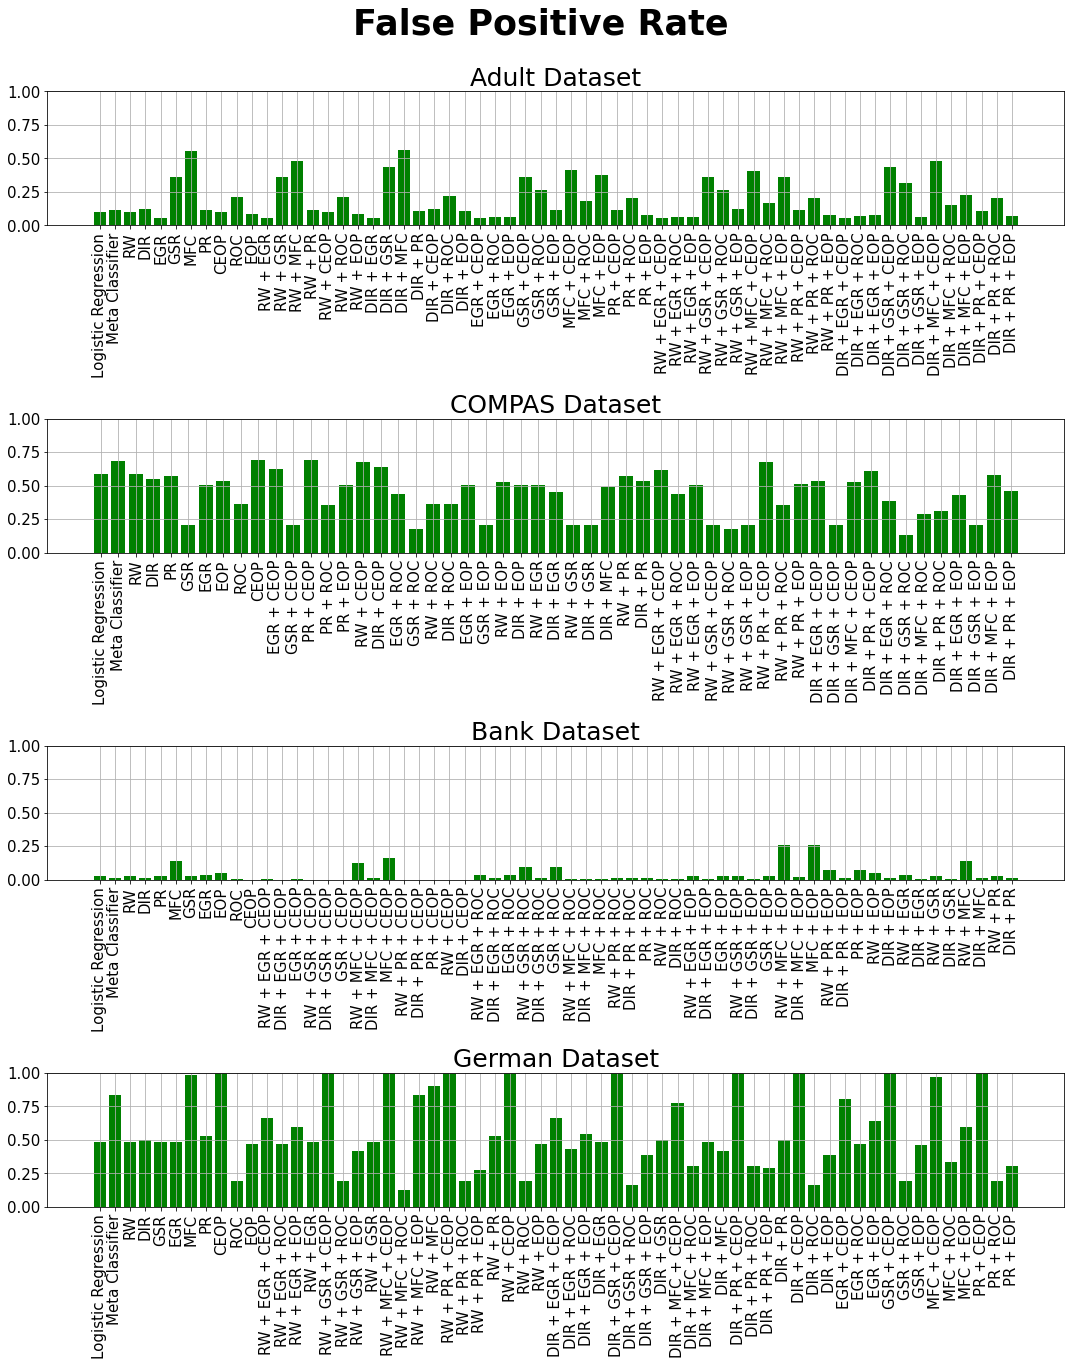

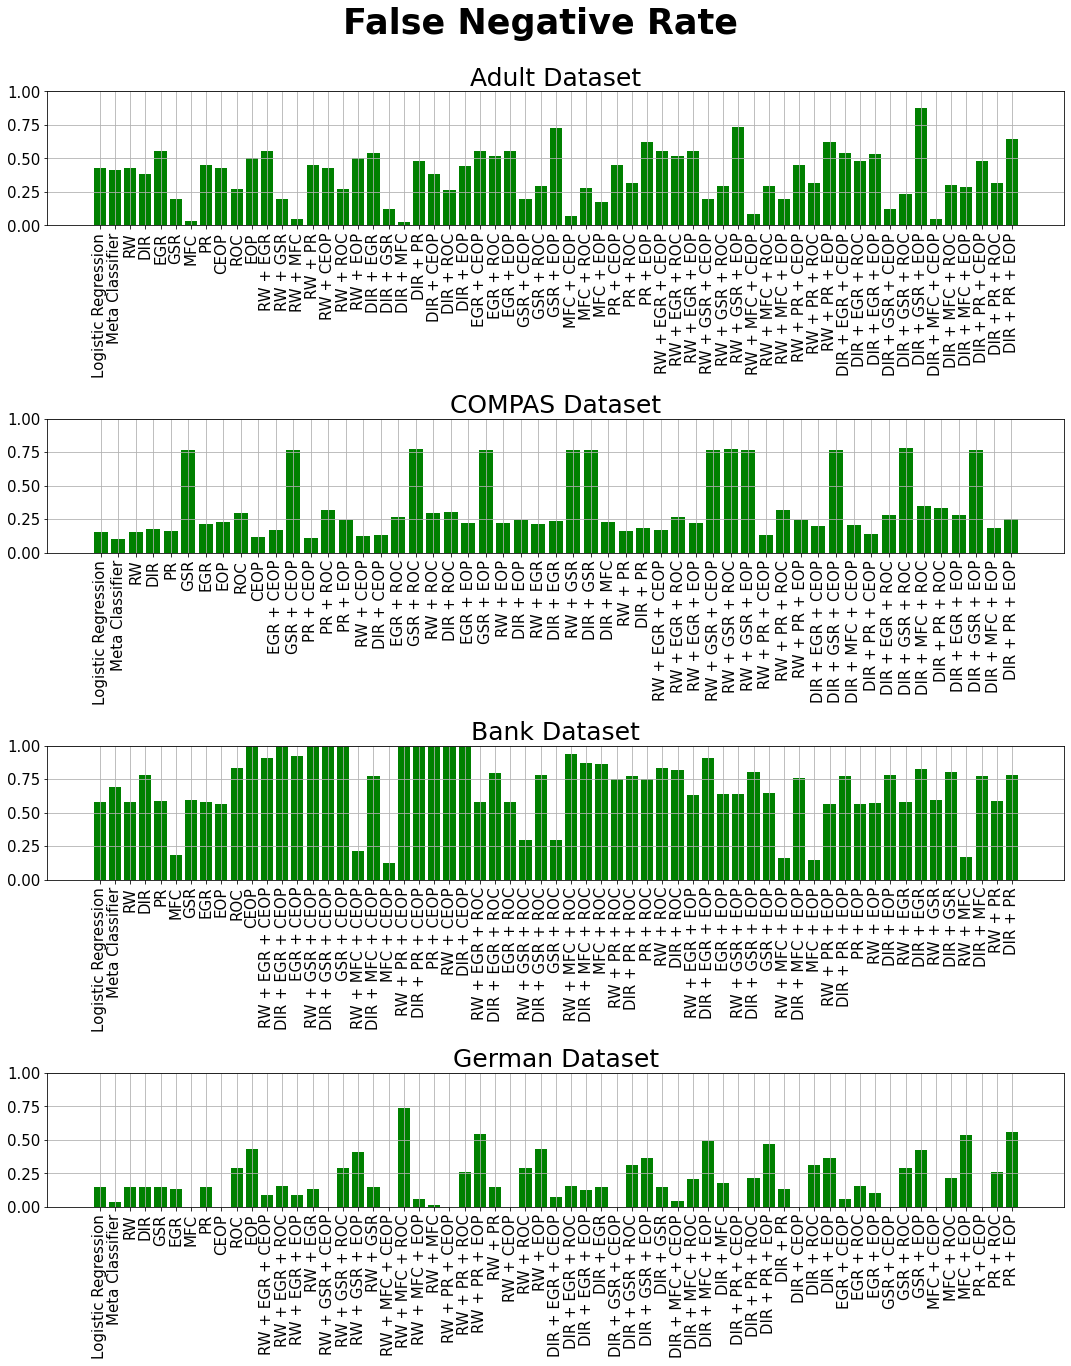

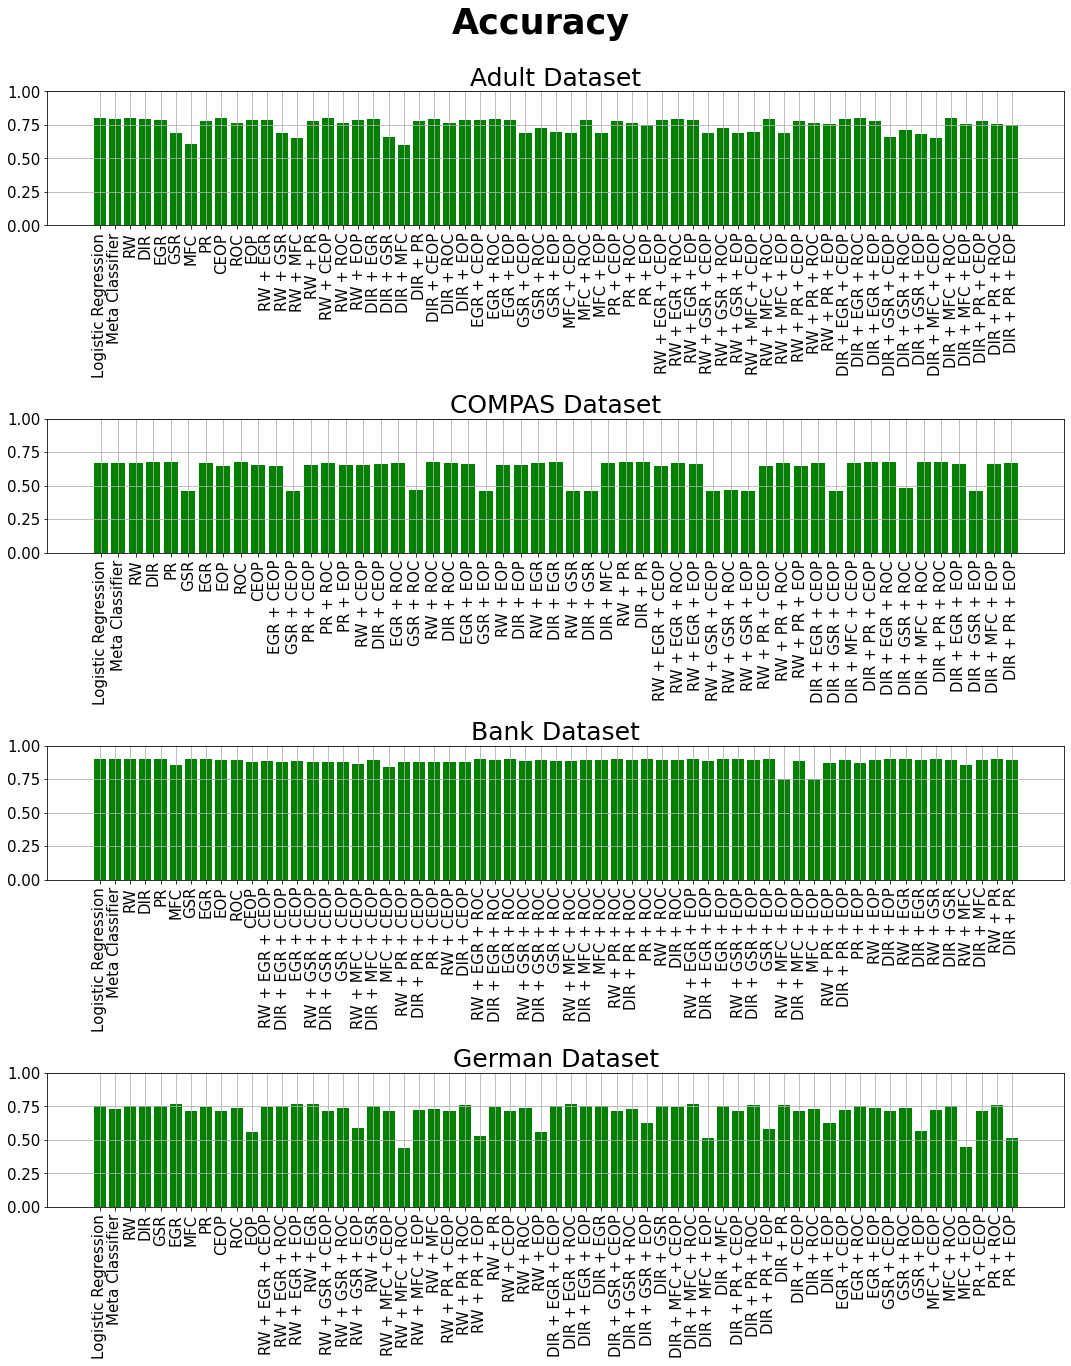

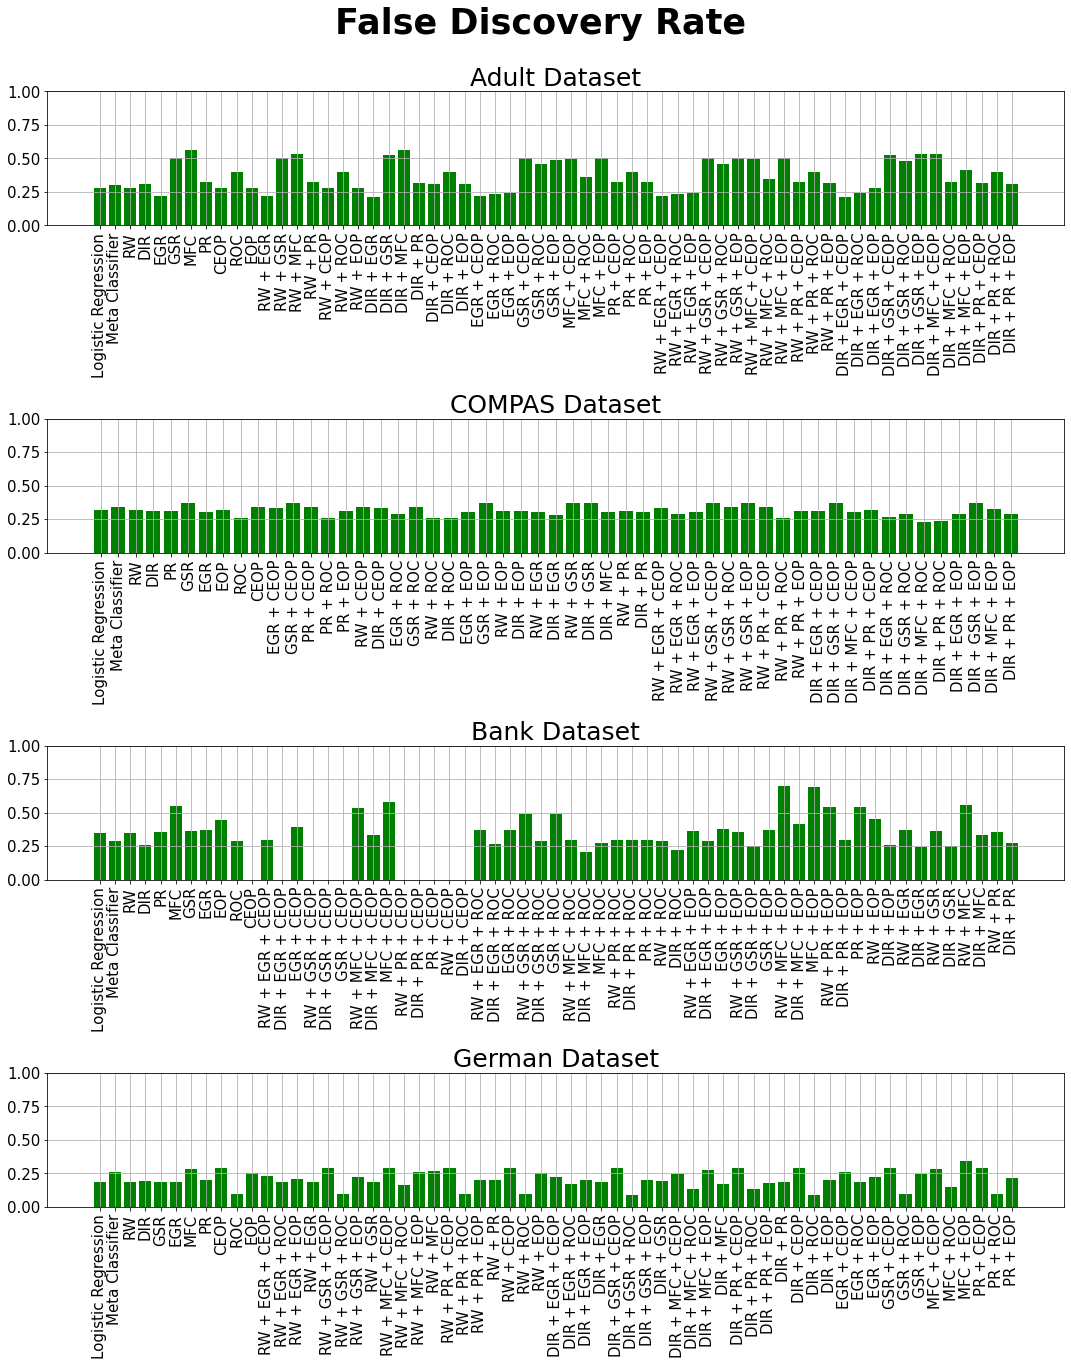

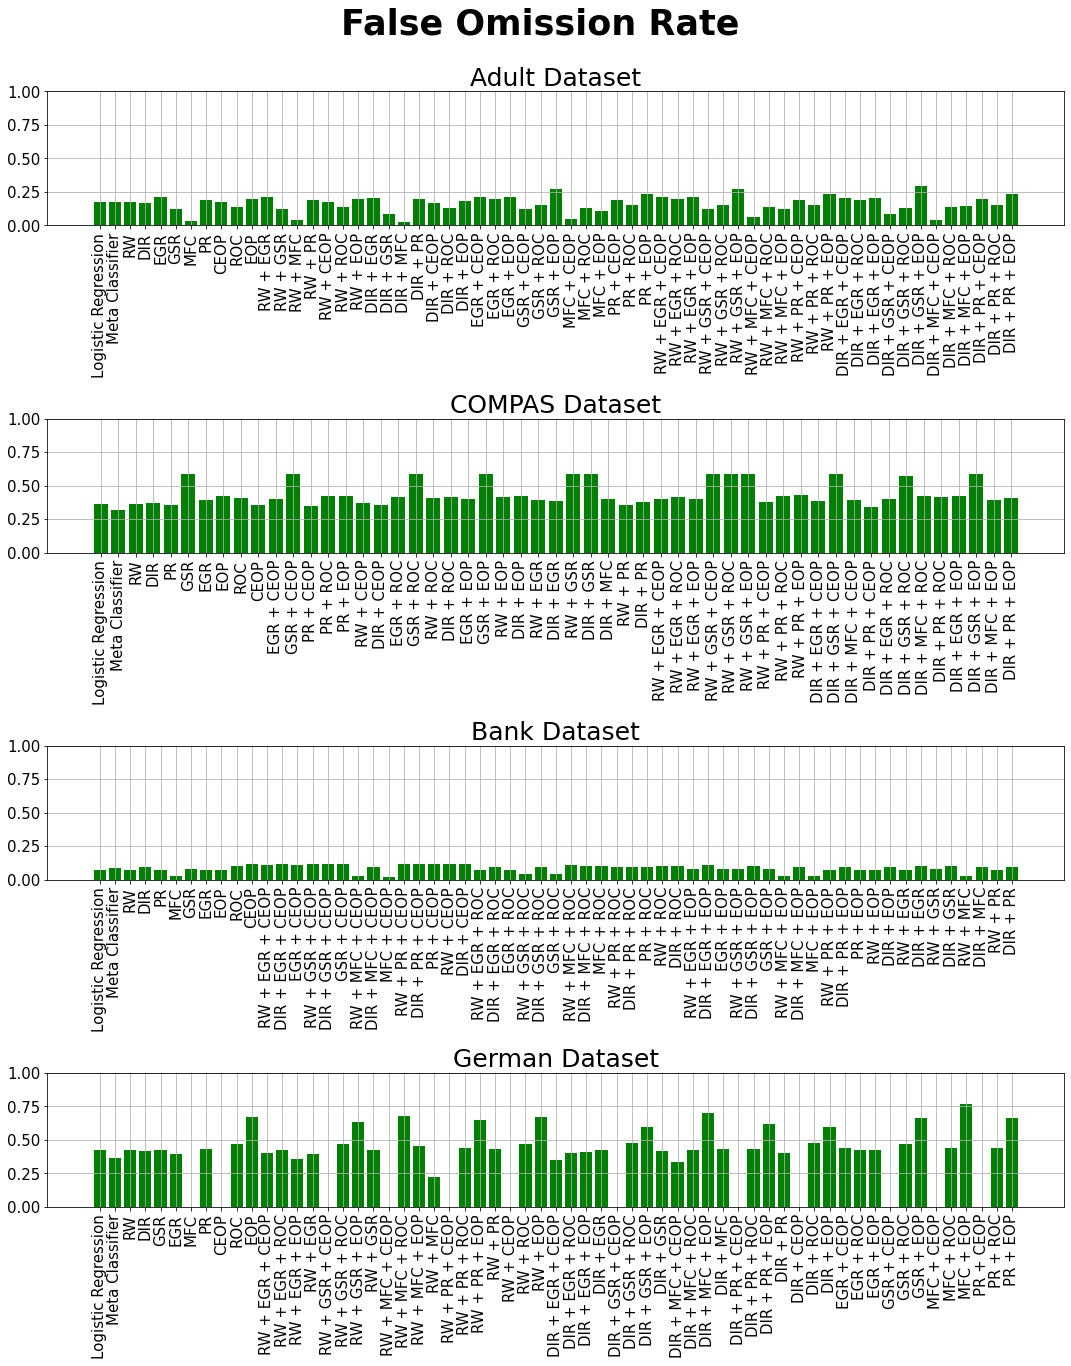

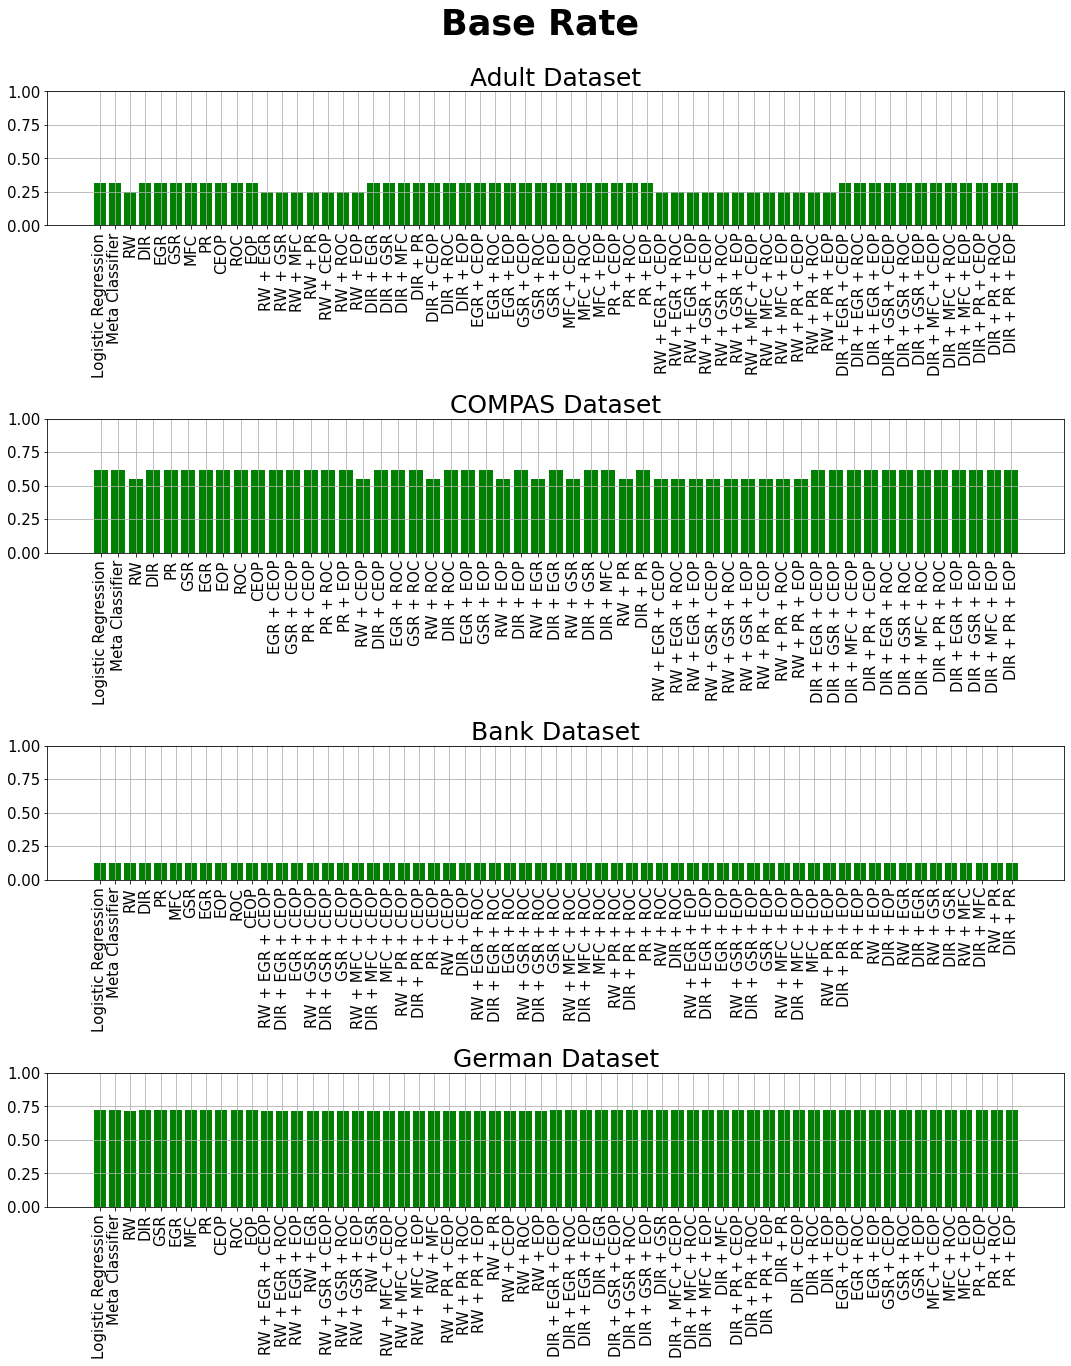

In [16]:
def create_graph(fairness_metric):
    fig, ax = plt.subplots(4, figsize=(15, 20))
    
    ax[0].patch.set_facecolor('white')
    ax[0].patch.set_alpha(1.0)
    ax[0].set_title("Adult Dataset", size=25)
    plt.rcParams.update({'font.size': 15})
    ax[0].set_ylim([0.0, 1.0])
    
    unpriv = list(adult_df[fairness_metric + " - Unprivileged"])
    priv = list(adult_df[fairness_metric + " - Privileged"])
    Labels=list(adult_df.index)
    y_pos=np.arange(len(Labels))
    plt.sca(ax[0])
    plt.xticks(y_pos, Labels)
    #ax[0].bar(y_pos - 0.2, unpriv,width=0.4, color = 'blue' , label='Unprivileged')
    ax[0].bar(y_pos, priv, color = 'green',label = 'Privileged')
    #ax[0].legend(('Unprivileged','Privileged'), loc='upper right')

    
    ax[1].patch.set_facecolor('white')
    ax[1].patch.set_alpha(1.0)
    ax[1].set_title("COMPAS Dataset", size=25)
    plt.rcParams.update({'font.size': 15})
    ax[1].set_ylim([0.0, 1.0])
    
    unpriv = list(compas_df[fairness_metric + " - Unprivileged"])
    priv = list(compas_df[fairness_metric + " - Privileged"])
    Labels=list(compas_df.index)
    y_pos=np.arange(len(Labels))
    plt.sca(ax[1])
    plt.xticks(y_pos, Labels)
    #ax[1].bar(y_pos - 0.2, unpriv,width=0.4, color = 'blue' , label='Unprivileged')
    ax[1].bar(y_pos, priv, color = 'green',label = 'Privileged')
    #ax[1].legend(('Unprivileged','Privileged'), loc='upper right')
    
    
    ax[2].patch.set_facecolor('white')
    ax[2].patch.set_alpha(1.0)
    ax[2].set_title("Bank Dataset", size=25)
    plt.rcParams.update({'font.size': 15})
    
    unpriv = list(bank_df[fairness_metric + " - Unprivileged"])
    priv = list(bank_df[fairness_metric + " - Privileged"])
    Labels=list(bank_df.index)
    y_pos=np.arange(len(Labels))
    plt.sca(ax[2])
    plt.xticks(y_pos, Labels)
    #ax[2].bar(y_pos - 0.2, unpriv,width=0.4, color = 'blue' , label='Unprivileged')
    ax[2].bar(y_pos, priv, color = 'green',label = 'Privileged')
    #ax[2].legend(('Unprivileged','Privileged'), loc='upper right')
    ax[2].set_ylim([0.0, 1.0])
    
    
    ax[3].patch.set_facecolor('white')
    ax[3].patch.set_alpha(1.0)
    ax[3].set_title("German Dataset", size=25)
    plt.rcParams.update({'font.size': 15})
    ax[3].set_ylim(0.0, 1.0)
    
    unpriv = list(german_df[fairness_metric + " - Unprivileged"])
    priv = list(german_df[fairness_metric + " - Privileged"])
    Labels=list(german_df.index)
    y_pos=np.arange(len(Labels))
    plt.sca(ax[3])
    plt.xticks(y_pos, Labels)
    #ax[3].bar(y_pos - 0.2, unpriv,width=0.4, color = 'blue' , label='Unprivileged')
    ax[3].bar(y_pos, priv, color = 'green',label = 'Privileged')
    #ax[3].legend(('Unprivileged','Privileged'), loc='upper right')
        
    for ax in fig.axes:
        plt.sca(ax)
        plt.xticks(rotation=90)
        ax.grid()
    
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])
    ax.xaxis.label.set_size(20)
    fig.suptitle(fairness_metric,fontweight="bold",fontsize=35)
    fig.patch.set_alpha(1.0)
    
    plt.savefig("Final Charts/" + fairness_metric + ".png", bbox_inches='tight', )

create_graph("False Positive Rate")
create_graph("False Negative Rate")
create_graph("Accuracy")
create_graph("False Discovery Rate")
create_graph("False Omission Rate")
create_graph("Base Rate")

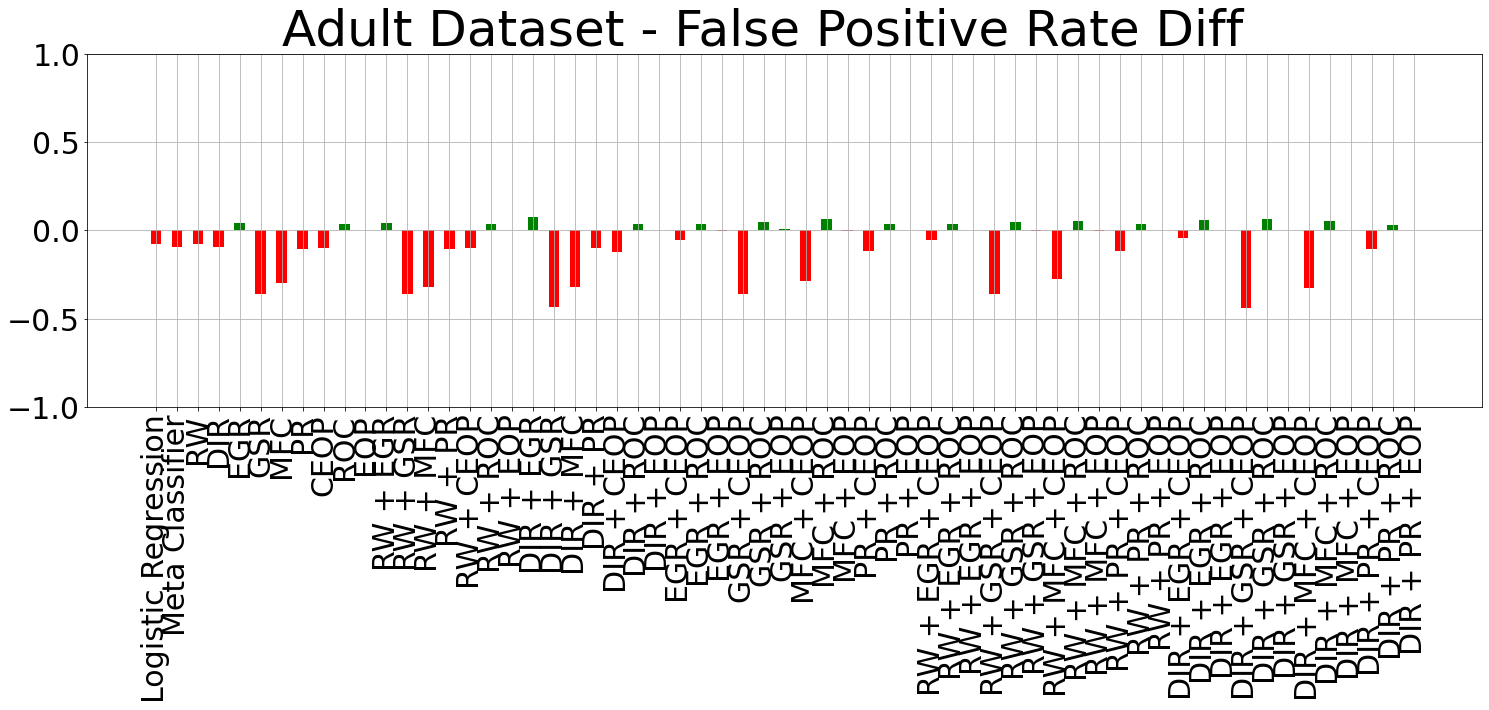

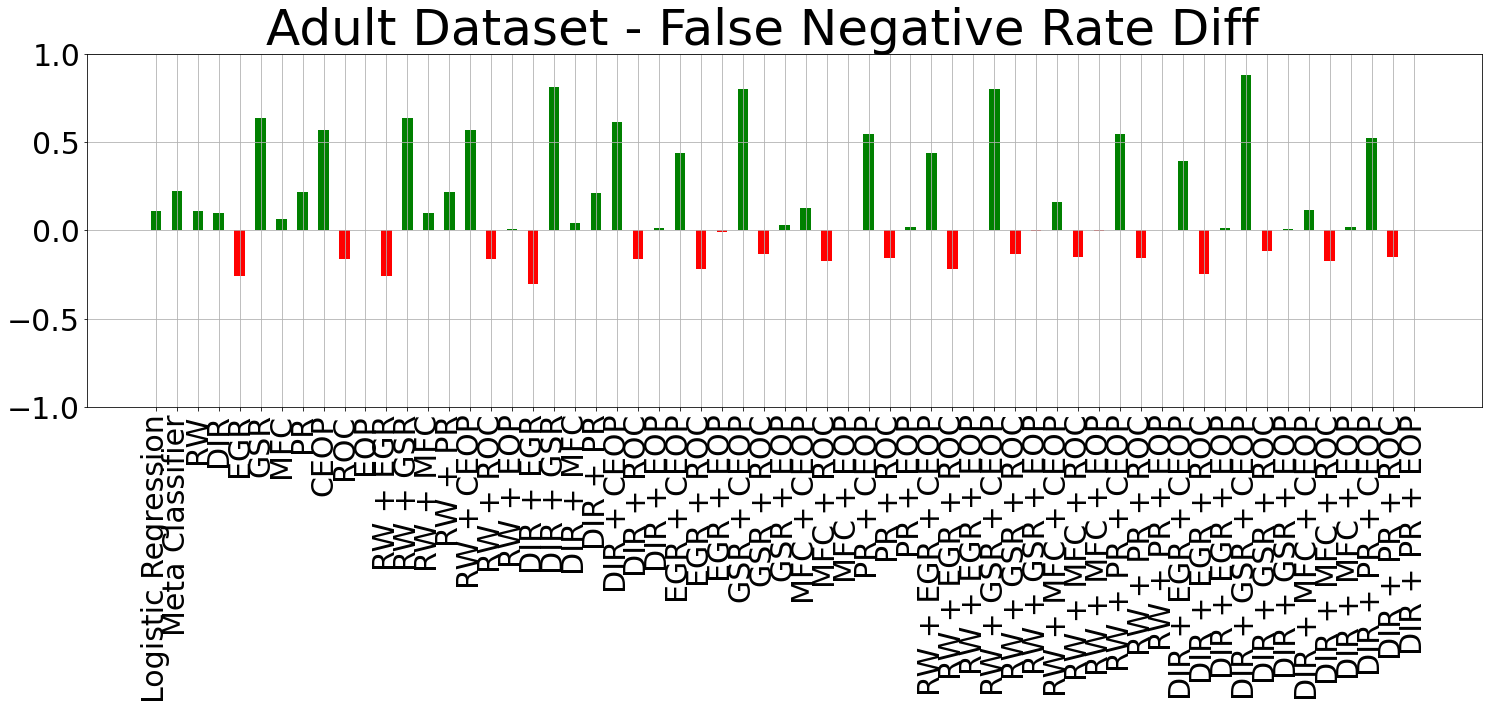

KeyError: 'Accuracy Diff'

In [18]:
def create_value_graph(fairness_metric):
    colors = []
    for val in adult_df[fairness_metric]:
        if val > 0:
            colors.append('g')
        elif val < 0:
            colors.append('r')
    for val in compas_df[fairness_metric]:
        if val > 0:
            colors.append('g')
        elif val < 0:
            colors.append('r')
    for val in bank_df[fairness_metric]:
        if val > 0:
            colors.append('g')
        elif val < 0:
            colors.append('r')
    for val in german_df[fairness_metric]:
        if val > 0:
            colors.append('g')
        elif val < 0:
            colors.append('r')

    fig = plt.figure(figsize=(25,6.5))
    fig.patch.set_facecolor('white')
    fig.patch.set_alpha(1.0)
    fig.suptitle("Adult Dataset - " + fairness_metric, fontsize=50)
    plt.rcParams.update({'font.size': 30})
    #plt.title("Adult Dataset - " + fairness_metric)
    y_vals = adult_df[fairness_metric]
    plt.bar(adult_df.index, y_vals, 0.5, color=colors)
    if fairness_metric == "Unprivileged Base Rate" or fairness_metric == "Privileged Base Rate":
        plt.ylim([0.0, 1.0])
    else:
        plt.ylim([-1., 1.])
    plt.xticks(rotation=90)
    plt.grid()
    #plt.savefig("Charts/Adult Dataset - " + fairness_metric + ".png", bbox_inches='tight', )
    plt.show()

create_value_graph("False Positive Rate Diff")
create_value_graph("False Negative Rate Diff")
create_value_graph("Accuracy Diff")
create_value_graph("False Discovery Rate Diff")
create_value_graph("False Omission Rate Diff")
create_value_graph("Statistical Parity Diff")

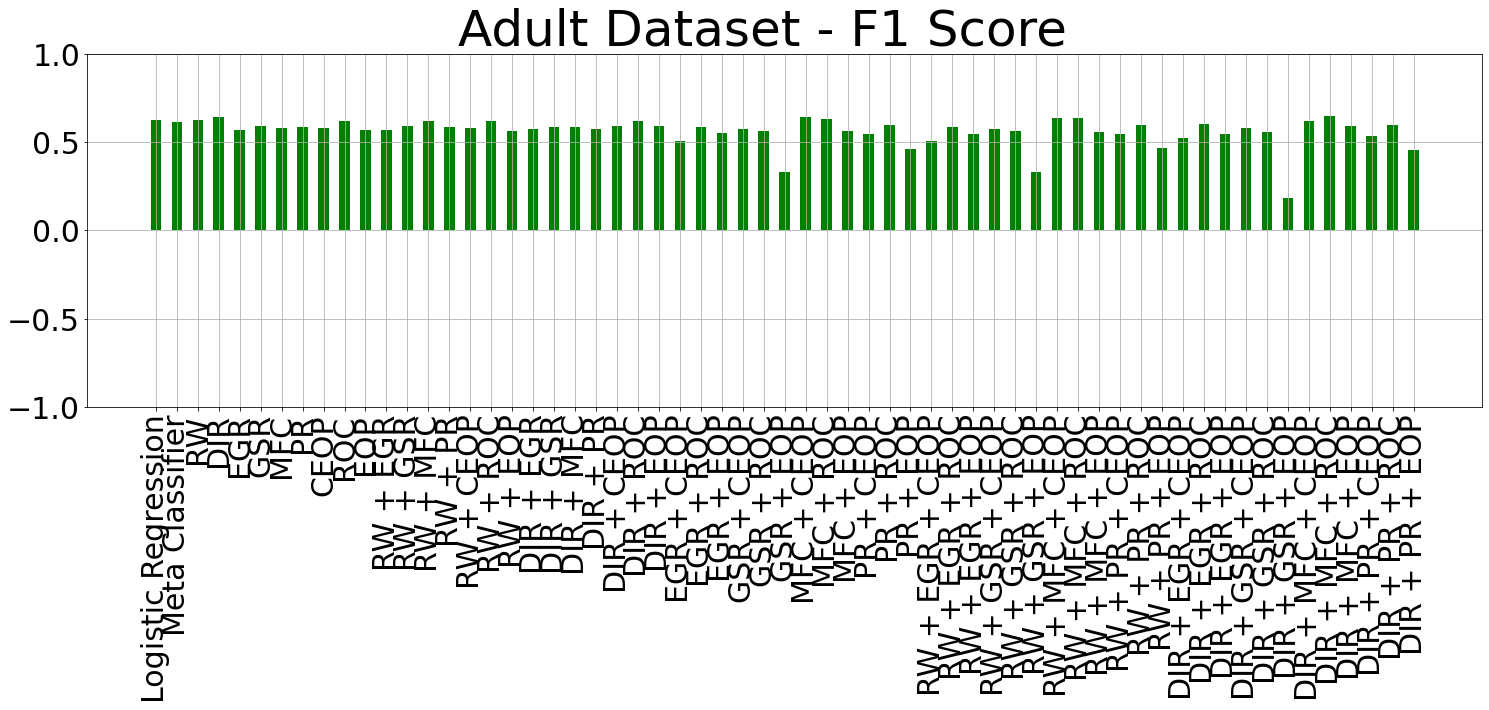

In [19]:
create_value_graph("F1 Score")
